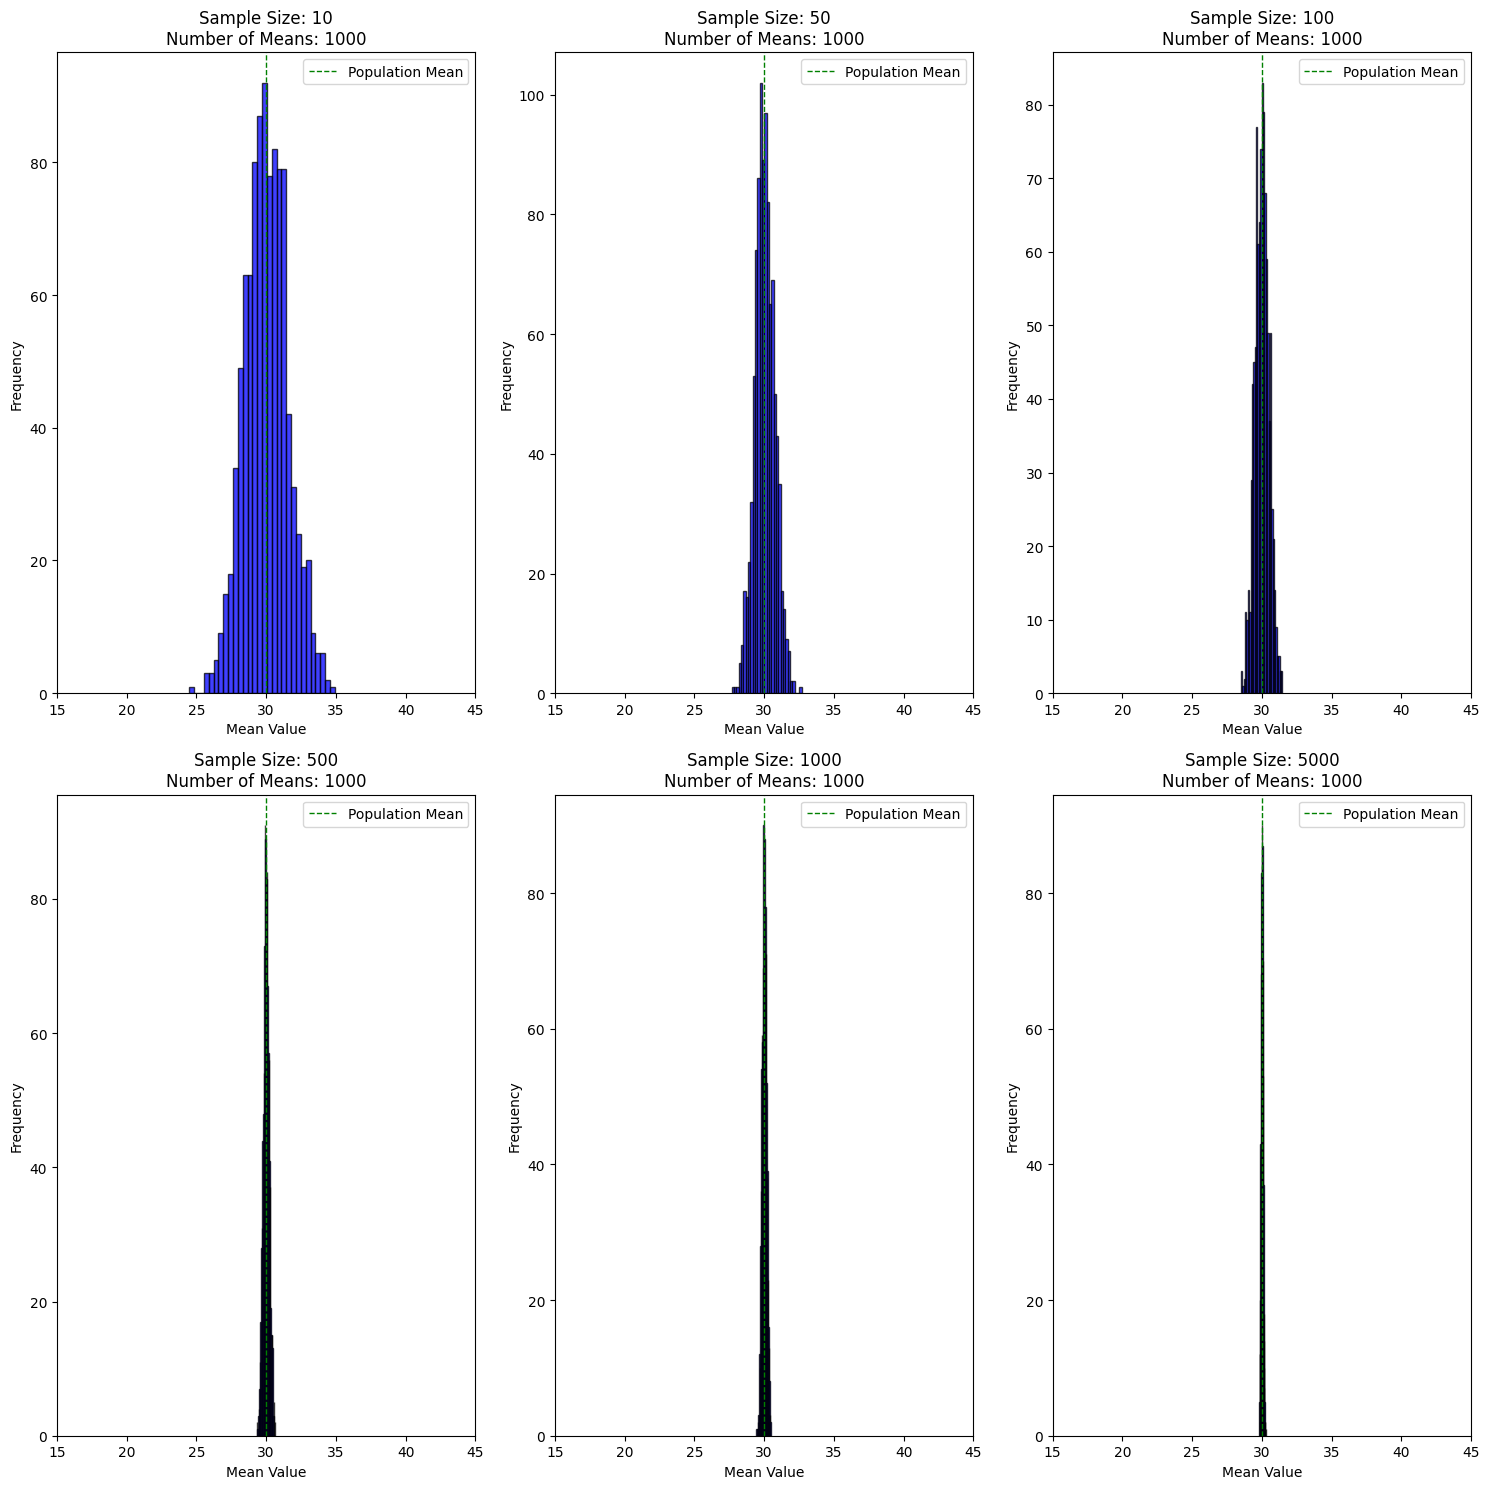

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 모집단의 평균과 표준편차
mu, sigma = 30, 5
# 표본 크기 목록
sample_sizes = [10,50,100,500,1000,5000]
# 표본평균 개수
num_means = 1000

# 그래프 설정
fig, axes = plt.subplots(2,3,figsize = (15, 15))
axes = axes.flatten()

# x축 범위 설정
x_limits = (mu -3*sigma, mu+3*sigma)

for i, size in enumerate(sample_sizes):
  sample_means = [np.mean(np.random.normal(mu, sigma, size)) for _ in range(num_means)]
  axes[i].hist(sample_means, bins = 30, alpha = 0.75, color = 'blue', edgecolor = 'black')
  axes[i].axvline(mu, color='green', linestyle = 'dashed', linewidth=1)
  axes[i].set_xlim(x_limits)
  axes[i].set_title(f'Sample Size: {size}\nNumber of Means: {num_means}')
  axes[i].set_xlabel('Mean Value')
  axes[i].set_ylabel('Frequency')
  axes[i].legend(['Population Mean'])

# 그래프 간격 조정
plt.tight_layout()
plt.show()

In [1]:
# 표본 데이터

data = [4.3, 4.1, 5.2, 4.9, 5.0, 4.5, 4.7, 4.8, 5.2, 4.6]

In [4]:
# 데이터를 통하여 모평균에 대한 구간 추정을 수행

from scipy.stats import t
import numpy as np

# 표본 평균
mean = np.mean(data)

# 표본 크기
n = len(data)

# 표준 오차
se = np.std(data, ddof=1) / np.sqrt(n)

# 95% 신뢰구간
print(round(mean - t.ppf(0.975, n-1)*se, 3), round(mean+t.ppf(0.975, n-1)*se, 3))

4.469 4.991


In [5]:
# t.interval로 구하기

ci = t.interval(0.95, loc = mean, scale = se, df= n-1)
print("95% 신뢰구간: ", [round(i,3) for i in ci])

95% 신뢰구간:  [np.float64(4.469), np.float64(4.991)]


In [6]:
from scipy.stats import norm
std = 5 / np.sqrt(30)
norm.sf(83, 80, std)

np.float64(0.0005075004735565336)

In [8]:
x = [4.62, 4.09, 6.2, 8.24, 0.77, 5.55, 3.11, 11.97, 2.16, 3.24, 10.91, 11.36, 0.87, 9.93, 2.9]
t_value = (np.mean(x)-7) / (np.std(x,ddof=1) / np.sqrt(len(x)))
round(t_value, 3)

np.float64(-1.279)

In [9]:
# Python 에서 t-검정 수행

# 단일 표본 t-검정

sample = [9.76, 11.1, 10.7, 10.72, 11.8, 6.15, 10.52, 14.83, 13.03, 16.46, 10.84, 12.45]

In [10]:
from scipy.stats import ttest_1samp

# 양측 검정
t_statistic, p_value = ttest_1samp(sample, popmean=10, alternative = 'two-sided')
print('t-statistic: ', t_statistic)
print('p-value: ', p_value)

t-statistic:  2.0508338167773075
p-value:  0.06488240727465687


In [11]:
# 독립 2 표본 t-검정

import pandas as pd

sample = [9.76, 11.1, 10.7, 10.72, 11.8, 6.15, 10.52, 14.83, 13.03, 16.46, 10.84, 12.45]
gender = ['Female']*7 + ['Male']*5

my_tab2 = pd.DataFrame({'score':sample, 'gender':gender})
print(my_tab2)

    score  gender
0    9.76  Female
1   11.10  Female
2   10.70  Female
3   10.72  Female
4   11.80  Female
5    6.15  Female
6   10.52  Female
7   14.83    Male
8   13.03    Male
9   16.46    Male
10  10.84    Male
11  12.45    Male


In [14]:
from scipy.stats import ttest_ind

male = my_tab2[my_tab2['gender'] == 'Male']
female = my_tab2[my_tab2['gender'] == 'Female']

# 단측 검정 (큰 쪽)

t_statistic, p_value = ttest_ind(male['score'], female['score'], equal_var=True, alternative = 'greater')
print("t-statistic: ", t_statistic)
print("p-value: ", p_value)

t-statistic:  2.9360367510416165
p-value:  0.007443073828957785


In [22]:
t_statistic, p_value = ttest_ind(male['score'], female['score'], equal_var=True, alternative = 'greater')
print("t-statistic: ", t_statistic)
print("p-value: ", p_value)

t_statistic, p_value = ttest_ind(female['score'], male['score'], equal_var=True, alternative='less')
print("t-statistic: ", t_statistic)
print("p-value: ", p_value)

t-statistic:  2.9360367510416165
p-value:  0.007443073828957785
t-statistic:  -2.9360367510416165
p-value:  0.007443073828957785


In [24]:
# 대응 표본 t-검정

import numpy as np
before = np.array([9.76, 11.1, 10.7, 10.72, 11.8, 6.15])
after = np.array([10.52, 14.83, 13.03, 16.46, 10.84, 12.45])

from scipy.stats import ttest_rel
t_statistic, p_value = ttest_rel(after, before, alternative = 'greater')
print("t-statistic: ", t_statistic)
print("p-value: ", p_value)

t-statistic:  2.5811614301011883
p-value:  0.02468128345546597


In [25]:
# 대응 표본 t-검정을 1 표본 t-검정으로 대체해서 구해보기

from scipy.stats import ttest_1samp
sample_d = after - before
t_statistic, p_value = ttest_1samp(sample_d, 0, alternative = 'greater')
print('t-statistic: ', t_statistic)
print('p-value: ', p_value)

t-statistic:  2.5811614301011883
p-value:  0.02468128345546597


In [26]:
# 독립 2표본 t-검정(분산 동일하지 않은 경우)

# 웰치스 -t 검정의 결과에서 자유도가 정수로 떨어지지 않는 이유는 복잡한 식의 근사때문이다.

Result = ttest_ind(male['score'], female['score'], equal_var = False, alternative= 'greater')
print(Result)

TtestResult(statistic=np.float64(2.850539711551644), pvalue=np.float64(0.010998564889502354), df=np.float64(7.8099774340434145))


In [29]:
# F-검정 수행

import numpy as np
import scipy.stats as stats

# 예시 데이터
oj_lengths = np.array([17.6, 9.7, 16.5, 12.0, 21.5, 23.3, 23.6, 26.4, 20.0, 25.2, 25.8, 21.2, 14.5, 27.3, 23.8])

vc_lengths = np.array([7.6, 4.2, 10.0, 11.5, 7.3, 5.8, 14.5, 10.6, 8.2, 9.4, 16.5, 9.7, 8.3, 13.6, 8.2])

# 표본표준편차 계산
s1 = oj_lengths.std(ddof=1)
s2 = vc_lengths.std(ddof=1)

# 분산의 비율 계산
ratio_of_variances = s1**2 / s2**2

print('ratio_of_variances: ', round(ratio_of_variances, 3))

ratio_of_variances:  2.722


In [30]:
# F 검정 함수의 정의

def f_test(x, y, alternative = 'two_sided'):
  x = np.array(x)
  y = np.array(y)
  df1 = len(x) -1
  df2 = len(y) -1
  f = np.var(x, ddof=1) / np.var(y, ddof=1) # 검정통계량
  if alternative == 'greater':
    p  = 1.0 - stats.f.cdf(f,df1,df2)
  elif alternative == 'less':
    p = stats.f.cdf(f,df1,df2)
  else:
    p = 2.0 * (1.0 - stats.f.cdf(f,df1,df2))
  return f, p

# F 검정 수행하기
f_value, p_value = f_test(oj_lengths, vc_lengths)

print("Test statistic: ", f_value)
print("p-value: ", p_value)

Test statistic:  2.7223514017700063
p-value:  0.07111637215506228
